In [1]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.groupby(by="area_type")['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1.shape

(13320, 9)

In [9]:
##Data Cleaning

df2 = df1.drop(["availability", "society", "balcony", "area_type", "society"],axis=1)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [11]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df2.dropna(inplace=True)

In [15]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [19]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df2["bhk"] = df2["size"].apply(lambda x:int(x.split(' ')[0]))

In [23]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [25]:
df2[df2["bhk"]>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [27]:
##there is a mistake with the total_sqft column; a building with a total square foot cannot accommodate 43 bedrooms
## I must explore the column below for the total square foot.
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [31]:
df2[~df2["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [33]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [35]:
df3 = df2.copy()

In [37]:
df3["total_sqft"] = df3["total_sqft"].apply(convert_sqft_to_num)
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [39]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [41]:
## NOW ITS TIME TO CARRY OUT SOME FEATURE ENGINEERING

In [43]:
df4 = df3.copy()

In [45]:
df4["price_per_sqft"] = df4["price"]*100000/df4["total_sqft"].round(2)

In [47]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [49]:
df4["location"] = df4["location"].apply(lambda x:x.strip())
location_stats = df4.groupby(by="location")["location"].agg("count")
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [51]:
len(location_stats[location_stats<=10])

1052

In [53]:
location_is_lessthan_10 = location_stats[location_stats<=10]

In [55]:
df4["location"] = df4["location"].apply(lambda x:"other" if x in location_is_lessthan_10 else x)

In [57]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [59]:
##NOW IT IS TIME FOR SOME OUTLIER DETECTION AND REMOVAL
##OUTLIERs - represent anomalies in a data set if not removed or accounted for can lead to the production of inaccurate models

In [61]:
df4[~(df4["total_sqft"]/df4["bhk"]<300)]
df5 = df4[~(df4["total_sqft"]/df4["bhk"]<300)]
df5
df5.shape

(12502, 7)

In [63]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000
mean,1590.189927,2.564790,111.311915,2.650696,6308.502830
std,1260.404795,1.084946,152.089966,0.981698,4168.127338
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [65]:
##I will be employing the statistical approach to carry out my outlier removal, so what I am gonna do is extreme cases
## that are greater than the values one SD away from the mean.

In [67]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf["price_per_sqft"])
        st = np.std(subdf["price_per_sqft"])
        reduced_df = subdf[(subdf["price_per_sqft"]>(m-st)) & (subdf["price_per_sqft"]<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= "True")
    return df_out

In [69]:
df6 = remove_pps_outliers(df5)
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [71]:
df6.shape

(10241, 7)

In [73]:
df5.shape

(12502, 7)

In [75]:
import matplotlib.pyplot as plt
import matplotlib

In [77]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df["location"]==location) & (df["bhk"]==2)]
    bhk3 = df[(df["location"]==location) & (df["bhk"]==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2["total_sqft"], bhk2["price"], color="blue", label="2 BHK", s=50)
    plt.scatter(bhk3["total_sqft"], bhk3["price"], color="red", label="3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

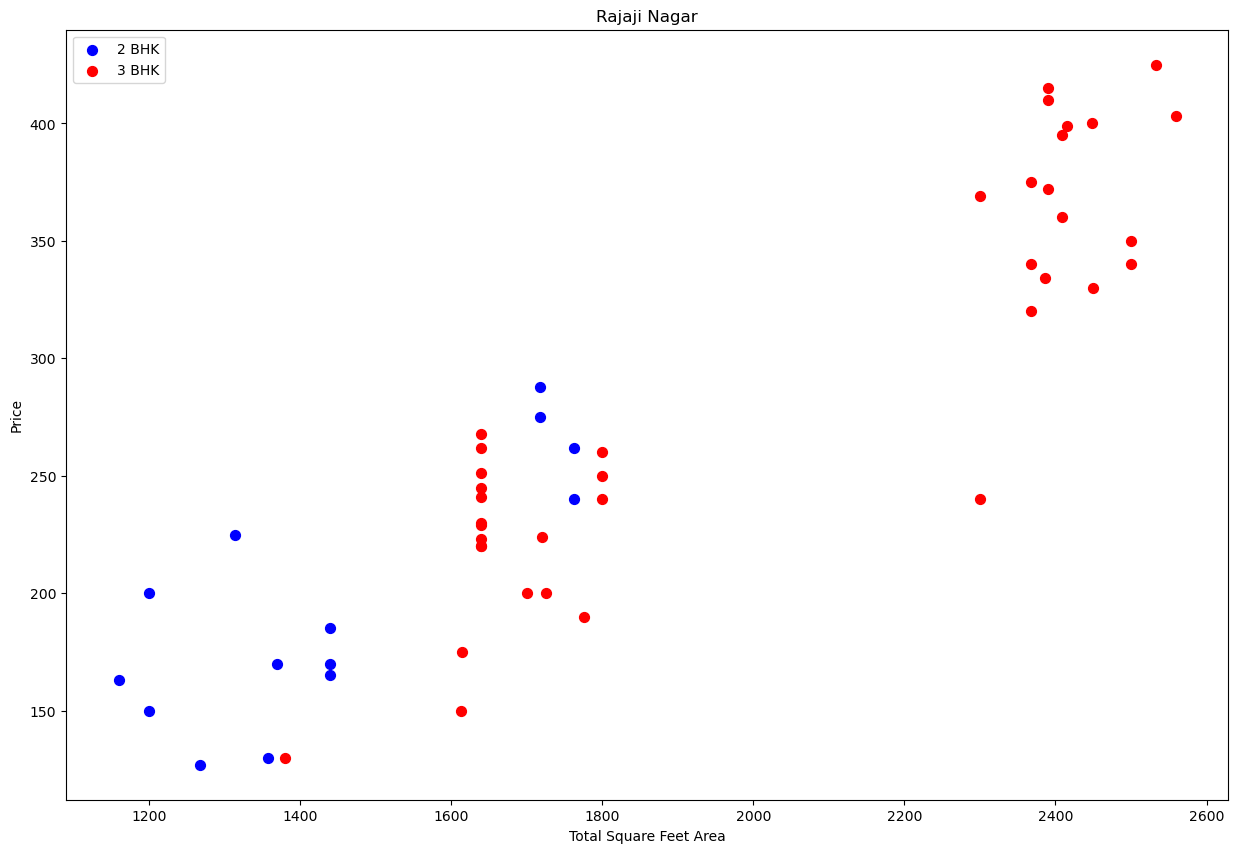

In [79]:
plot_scatter_chart(df6,"Rajaji Nagar")

In [81]:
def remove_bhk_outliers(df):
    exclude_indicies = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean":np.mean(bhk_df["price_per_sqft"]),
                "std":np.std(bhk_df["price_per_sqft"]),
                "count":bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indicies = np.append(exclude_indicies, bhk_df[bhk_df["price_per_sqft"]<(stats["mean"])].index.values)
    return df.drop(exclude_indicies, axis = "index")

In [83]:
df7 = remove_bhk_outliers(df6)
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


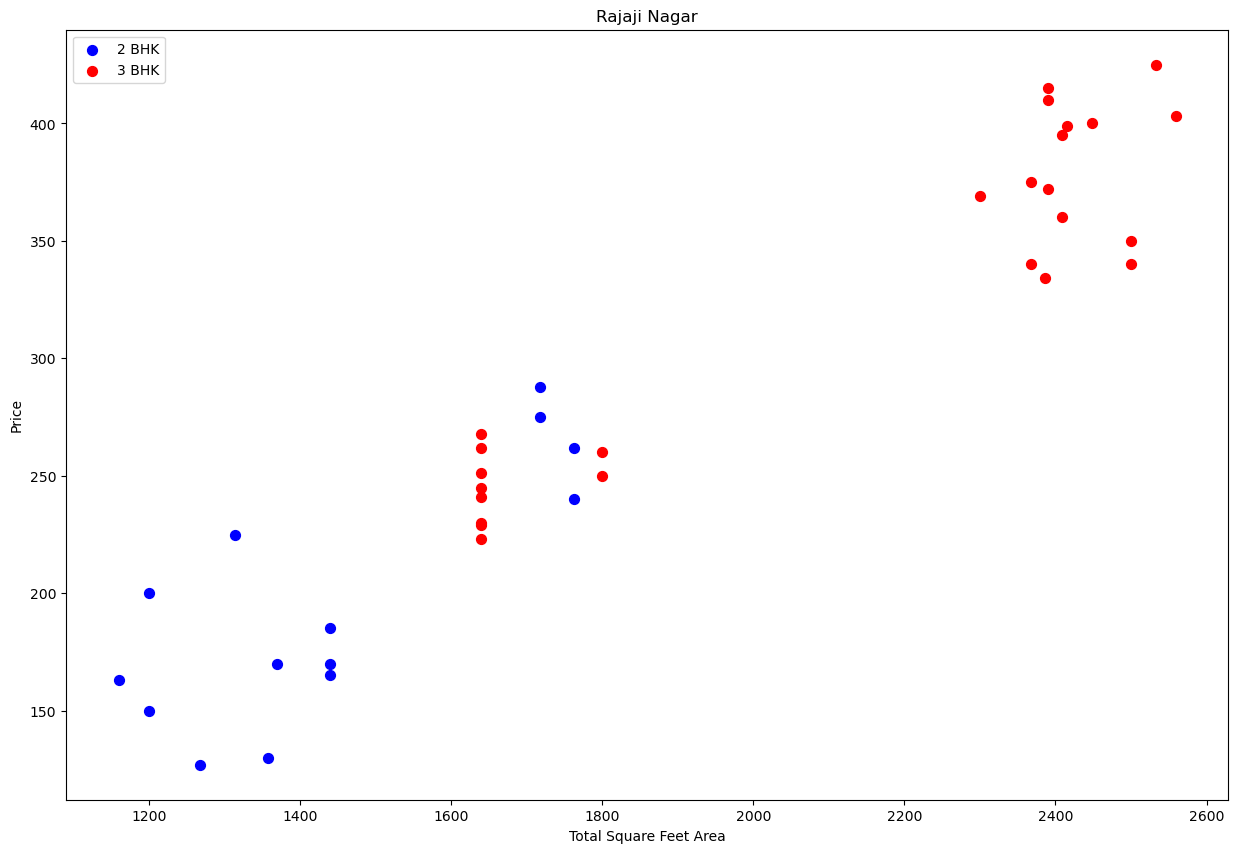

In [85]:
plot_scatter_chart(df7,"Rajaji Nagar")

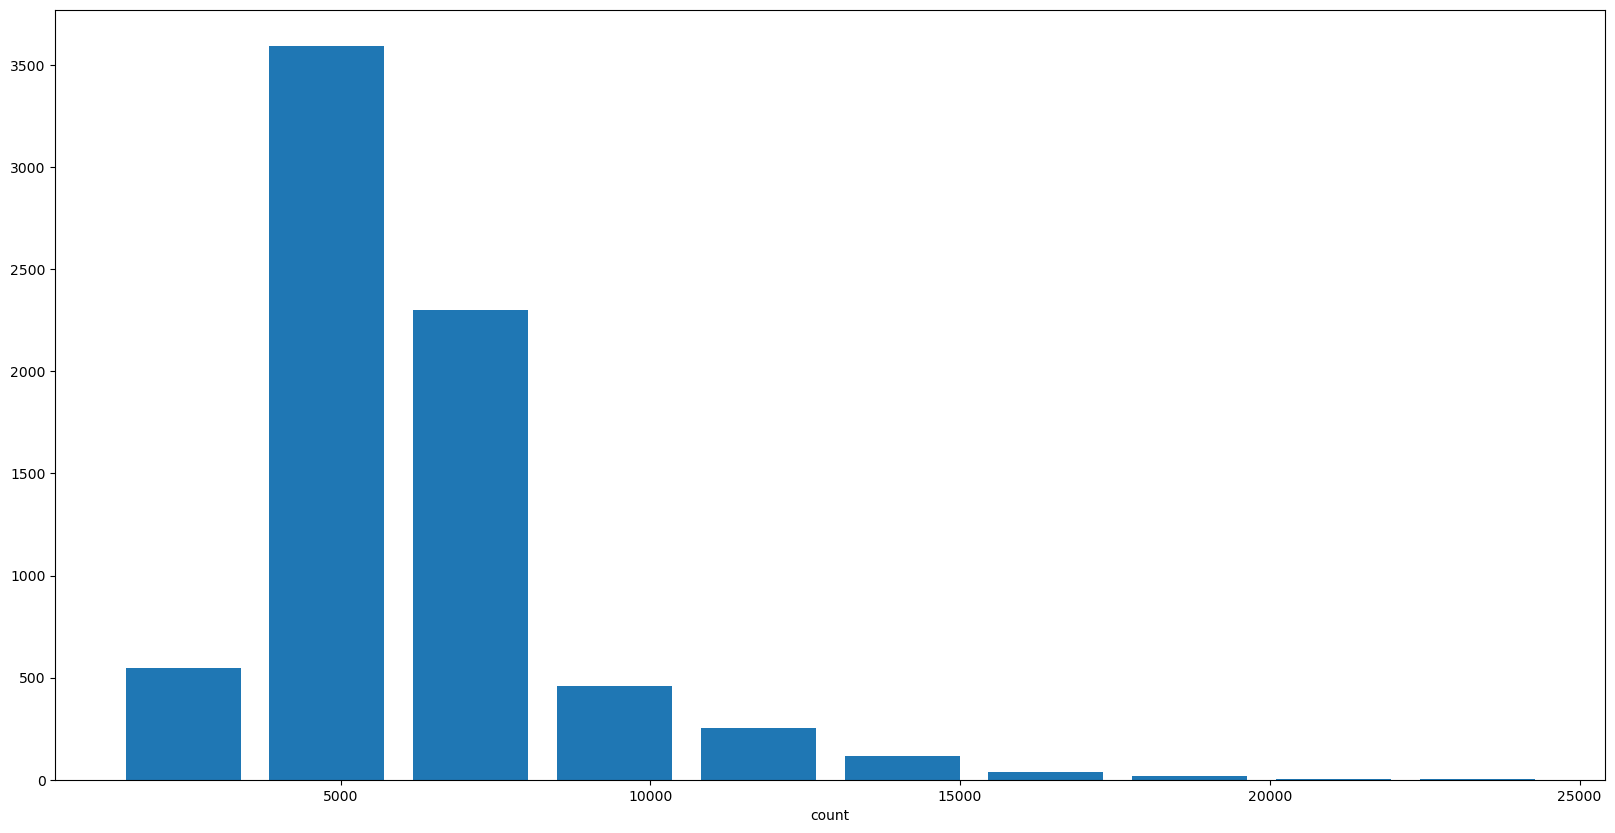

In [87]:
matplotlib.rcParams["figure.figsize"]= (20,10)
plt.hist(df7["price_per_sqft"],rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.xlabel("count");

In [89]:
df8 = df7[df7["bath"]<df7["bhk"]+2]
df8.shape

(7251, 7)

In [91]:
df9 = df8.drop(columns=["size","price_per_sqft"])
df9

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [189]:
df9["location_code"] = df9["location"].astype("category").cat.codes

In [191]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [195]:
from sklearn.linear_model import LinearRegression

In [197]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 10240
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       7251 non-null   object 
 1   total_sqft     7251 non-null   float64
 2   bath           7251 non-null   float64
 3   price          7251 non-null   float64
 4   bhk            7251 non-null   int64  
 5   location_code  7251 non-null   int16  
dtypes: float64(3), int16(1), int64(1), object(1)
memory usage: 612.1+ KB


In [233]:
dummies = pd.get_dummies(df9["location"]).astype(int)
dummies
df10 = pd.concat([df9,dummies.drop("other",axis="columns")],axis="columns")
df11 = df10.drop("location",axis="columns")
df11

,total_sqft,bath,price,bhk,location_code,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,241,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,241,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,241,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,241,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
X = df11.drop("price",axis="columns")
X
y = df11["price"]

In [311]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [313]:
from sklearn.model_selection import train_test_split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [317]:
from sklearn.linear_model import LinearRegression

In [319]:
lr_clf = LinearRegression()
lr_clf

LinearRegression()

In [321]:
lr_clf.fit(X_train,y_train)

LinearRegression()

In [323]:
lr_clf.score(X_test,y_test)

0.8077639092881278

In [325]:
##Applying the K-fold Cross Validation to evaluate the performance of the above model to ensure it generalizes well to unseen data

In [327]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [329]:
cv = ShuffleSplit(n_splits=5,test_size=0.33, random_state=0,)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82411712, 0.79667272, 0.86211891, 0.82409415, 0.84578905])

In [331]:
##from the above result from cross-validation it is clear that majority of the values are greater than 80
##but still I want to evaluate further to get the best algorithm.

In [350]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [372]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def how_to_getdbest_predalgo(X, y, algos):
    scores = []
    cv = ShuffleSplit(n_splits=5, random_state=0, test_size=0.33)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            "model": algo_name,
            "score": gs.best_score_,
            "params": gs.best_params_
        })
    return pd.DataFrame(scores, columns=["model", "score", "params"])

# Example usage
algos = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {"fit_intercept": [True, False]}
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {"max_depth": [1, 5, 10]}
    },
    "Lasso":{
        "model": Lasso(),
        "params":{"alpha":[1,2],"selection":["random","cyclic"]}
    }
}

# Assuming X and y are your feature matrix and target vector
results = how_to_getdbest_predalgo(X, y, algos)
print(results)


              model     score                               params
0  LinearRegression  0.831119             {'fit_intercept': False}
1      DecisionTree  0.743463                    {'max_depth': 10}
2             Lasso  0.704033  {'alpha': 1, 'selection': 'random'}


In [ ]:
##the best model used for predicting this house price Bengaluru,India is the Linear Regression model